In [5]:
import numpy as np
import pandas as pd
from matplotlib.patches import Arc
import json
import pprint
import matplotlib.pyplot as plt
from pandas import json_normalize
import matplotlib.patches as pat


In [6]:
with open('../data/statsbomb360/events/3788747.json', 'r', encoding='utf-8') as file:
    matches=json.load(file)

matches = json_normalize(matches)


In [7]:
with open('../data/statsbomb360/events/3788747.json', encoding='utf-8') as file:
    events=json.load(file)

events = json_normalize(events)
#print(events[(events["type.name"]=="Pass")]) 

liste = ["location","player.name","pass.recipient.name","pass.end_location","pass.angle", "pass.outcome.name"]
passes_austria = events[(events["type.name"]=="Pass") & (events["team.name"]=="Austria")][liste]

passes_austria.head()


,location,player.name,pass.recipient.name,pass.end_location,pass.angle,pass.outcome.name
4,"[60.0, 40.0]",Christoph Baumgartner,Sasa Kalajdzic,"[60.3, 41.4]",1.359703,NaN
7,"[57.4, 39.7]",Sasa Kalajdzic,David Olatukunbo Alaba,"[34.5, 38.0]",-3.067493,NaN
10,"[34.9, 38.9]",David Olatukunbo Alaba,Aleksandar Dragović,"[35.6, 54.7]",1.526521,NaN
13,"[36.7, 55.3]",Aleksandar Dragović,David Olatukunbo Alaba,"[33.7, 41.7]",-1.787908,NaN
16,"[34.3, 38.8]",David Olatukunbo Alaba,Martin Hinteregger,"[45.1, 16.6]",-1.118018,NaN


In [8]:


dist = passes_austria.apply(lambda row: list(np.subtract(list(row["pass.end_location"]),[x for x in row.location])),axis = 1)
norm = np.zeros(len(dist))
for i,element in enumerate(list(dist)):
    norm[i] = np.linalg.norm(element)
passes_austria["dist"] = norm
passes_austria.head()


,location,player.name,pass.recipient.name,pass.end_location,pass.angle,pass.outcome.name,dist
4,"[60.0, 40.0]",Christoph Baumgartner,Sasa Kalajdzic,"[60.3, 41.4]",1.359703,NaN,1.431782
7,"[57.4, 39.7]",Sasa Kalajdzic,David Olatukunbo Alaba,"[34.5, 38.0]",-3.067493,NaN,22.963014
10,"[34.9, 38.9]",David Olatukunbo Alaba,Aleksandar Dragović,"[35.6, 54.7]",1.526521,NaN,15.815499
13,"[36.7, 55.3]",Aleksandar Dragović,David Olatukunbo Alaba,"[33.7, 41.7]",-1.787908,NaN,13.926952
16,"[34.3, 38.8]",David Olatukunbo Alaba,Martin Hinteregger,"[45.1, 16.6]",-1.118018,NaN,24.687649


               player.name  loc_x  loc_y
0      Aleksandar Dragović  55.30  65.70
1            Andreas Ulmer  84.75   7.70
2    Christoph Baumgartner  86.55  30.75
3          Daniel Bachmann  12.05  41.10
4   David Olatukunbo Alaba  50.10  35.20
5    Julian Baumgartlinger  31.30  19.60
6            Konrad Laimer  84.80  55.50
7          Marcel Sabitzer  77.90  19.50
8         Marko Arnautović  84.90  27.50
9       Martin Hinteregger  57.00  16.90
10     Michael Gregoritsch  83.50  21.50
11        Philipp Lienhart  40.90  63.10
12          Sasa Kalajdzic  83.25  39.85
13         Stefan Ilsanker  42.10  32.90
14           Stefan Lainer  64.20  75.85
15          Xaver Schlager  72.80  34.25
16


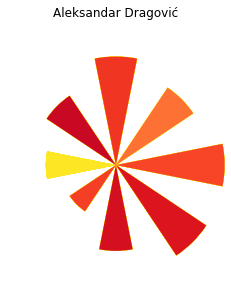

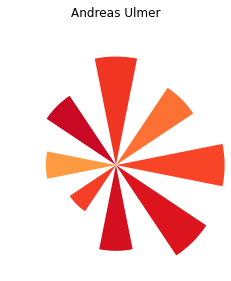

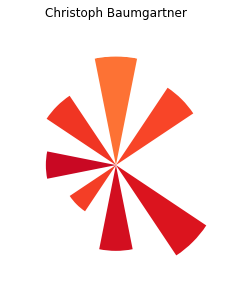

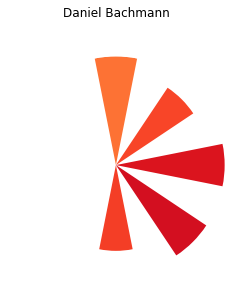

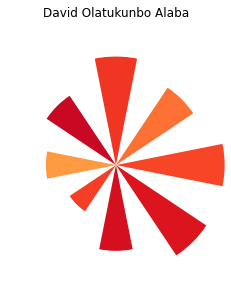

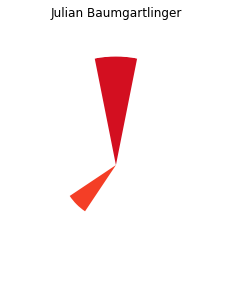

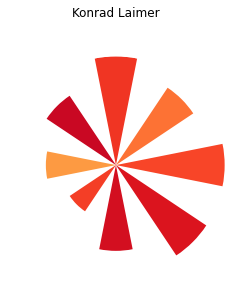

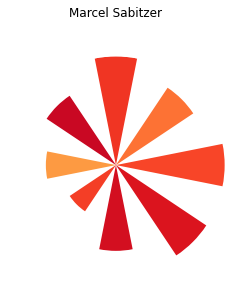

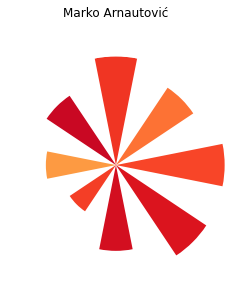

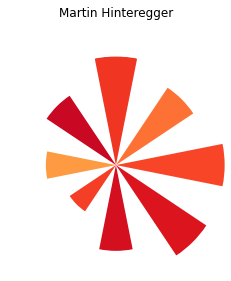

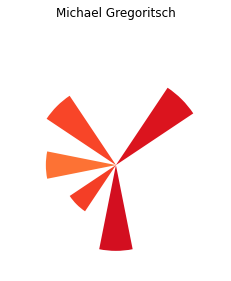

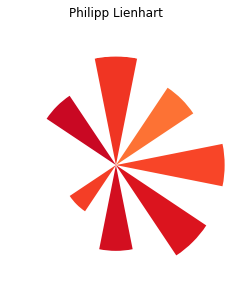

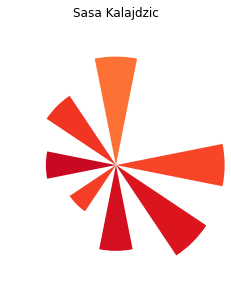

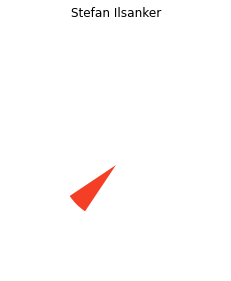

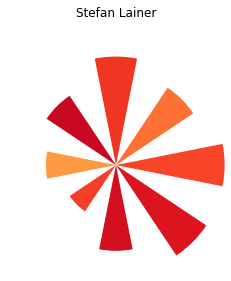

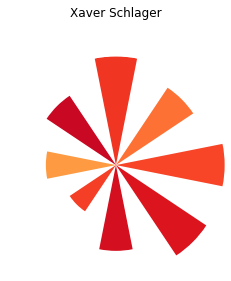

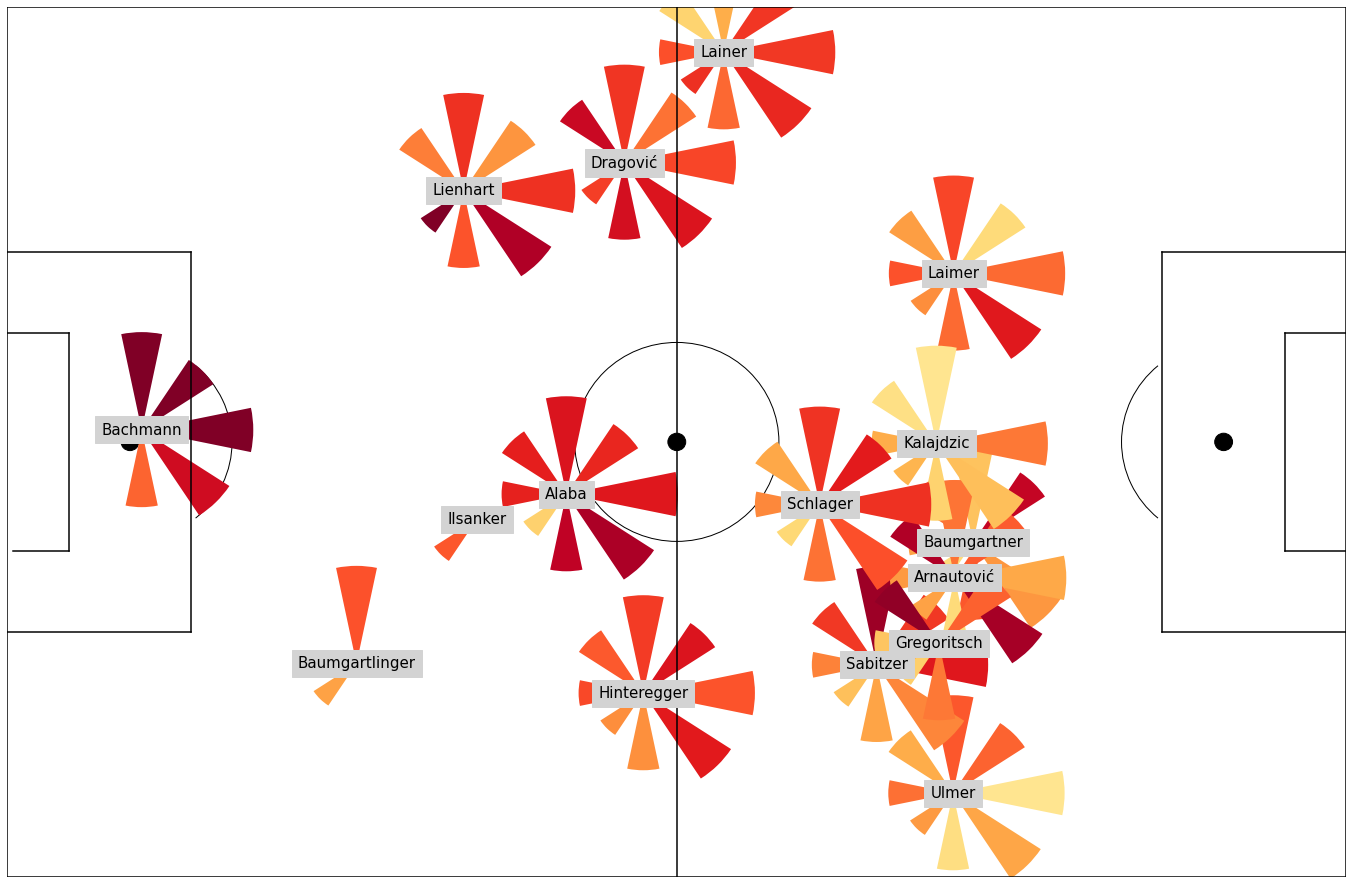

In [10]:
divisor = 8
degree = np.pi*2/divisor
passes_austria["angle_cat"] = (
    (passes_austria["pass.angle"] // (np.pi*2/divisor)) + 1)/(divisor/2)*np.pi

passes_austria["count"] = passes_austria.groupby(
    'angle_cat')['angle_cat'].transform('count')

passes_austria[['loc_x', 'loc_y']] = pd.DataFrame(
    passes_austria.location.tolist(), index=passes_austria.index)
player_pos = passes_austria.groupby(["player.name"], as_index=False)
player_pos = player_pos.agg({"loc_x": "median", "loc_y": "median"})
print(player_pos)

team = False
if team:
    pass_sonar = passes_austria.groupby(["angle_cat"], as_index=False)
else:
    pass_sonar = passes_austria.groupby(
        ["player.name", "angle_cat"], as_index=False)

pass_sonar = pass_sonar.agg({"dist": "mean", "count": "median"})

ax = plt.subplot(111, projection='polar')

my_cmap = plt.cm.get_cmap('viridis')
colors = my_cmap(pass_sonar["dist"])
bars = ax.bar(pass_sonar["angle_cat"], pass_sonar["count"],
              width=np.pi/divisor, color=colors)

players = pass_sonar["player.name"].unique()
print(len(players))

for player in players:
    player_sonar = pass_sonar[pass_sonar["player.name"] == player].copy()
    ax = plt.subplot(111, projection="polar")
    my_cmap = plt.cm.get_cmap('YlOrRd')
    colors = my_cmap(pass_sonar["dist"]/30)
    bars = ax.bar(list(player_sonar["angle_cat"]), list(
        player_sonar["count"]), width=np.pi/divisor, color=colors)
    ax.set_ylim(0, 90)
    plt.axis("off")
    plt.title(player + "\n")
    plt.show()


fig, ax = plt.subplots()
fig.set_size_inches(24, 16)
plt.xlim(0, 120)
plt.ylim(0, 80)
plt.axis("off")

# Pitch Outline & Centre Line
plt.plot([0, 0], [0, 80], color="black")
plt.plot([0, 120], [80, 80], color="black")
plt.plot([120, 120], [80, 0], color="black")
plt.plot([120, 0], [0, 0], color="black")
plt.plot([60, 60], [0, 80], color="black")

# Left Penalty Area
plt.plot([16.5, 16.5], [57.5, 22.5], color="black")
plt.plot([0, 16.5], [57.5, 57.5], color="black")
plt.plot([16.5, 0], [22.5, 22.5], color="black")

# Right Penalty Area
plt.plot([120, 103.5], [57.5, 57.5], color="black")
plt.plot([103.5, 103.5], [57.5, 22.5], color="black")
plt.plot([103.5, 120], [22.5, 22.5], color="black")

# Left 6-yard Box
plt.plot([0, 5.5], [50, 50], color="black")
plt.plot([5.5, 5.5], [50, 30], color="black")
plt.plot([5.5, 0.5], [30, 30], color="black")

# Right 6-yard Box
plt.plot([120, 114.5], [50, 50], color="black")
plt.plot([114.5, 114.5], [50, 30], color="black")
plt.plot([114.5, 120], [30, 30], color="black")

# Prepare Circles
centreCircle = plt.Circle((60, 40), 9.15, color="black", fill=False)
centreSpot = plt.Circle((60, 40), 0.8, color="black")
leftPenSpot = plt.Circle((11, 40), 0.8, color="black")
rightPenSpot = plt.Circle((109, 40), 0.8, color="black")

# Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

# Prepare Arcs
leftArc = Arc((11, 40), height=18.3, width=18.3, angle=0,
              theta1=310, theta2=50, color="black")
rightArc = Arc((109, 40), height=18.3, width=18.3, angle=0,
               theta1=130, theta2=230, color="black")

# Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)


for _, player in player_pos.iterrows():
    ax.text(player.loc_x, player.loc_y, player["player.name"].split(
    )[-1], ha="center", va="center", color="black", backgroundcolor="lightgray", size=15)

    player_sonar = pass_sonar[pass_sonar["player.name"]
                              == player["player.name"]]

    for _, row in player_sonar.iterrows():
        my_cmap = plt.cm.get_cmap('YlOrRd')
        colors = my_cmap(row["dist"]/30)
        pass_wedge = pat.Wedge(
            center=(player.loc_x, player.loc_y), r=int(row["count"])*0.1, theta1=row["angle_cat"]/np.pi*180 - 11.75, theta2=row["angle_cat"]/np.pi*180 + 11.75, facecolor=colors
        )
        ax.add_patch(pass_wedge)

plt.savefig("../upload/Passing_sonars_austria.png")
